In [2]:
import numpy as np
import matplotlib.pyplot as plt
import torch
from torch.utils.data import Dataset, DataLoader
from torch import nn
from tqdm import tqdm
from utils import TimeseriesDataset
from model import nts_RNN, nts_MLP, train_model

In [3]:
def run_training(dataset_name, seq_len, batch_size, learning_rate, hidden_size, weight_decay, save_model, model_save_name, MLP_flag=False):
    train_dataset = TimeseriesDataset(dataset_name, seq_len)
    train_loader = DataLoader(train_dataset, batch_size, shuffle=True)
    if MLP_flag:
        model = nts_MLP(hidden_size, input_size=seq_len)
    else:
        model = nts_RNN(hidden_size)

    loss_function = nn.MSELoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate, weight_decay=weight_decay)

    num_epoch = 1000
    loss_log = np.zeros(num_epoch)
    for epoch_id in tqdm(range(num_epoch)):
        loss_log[epoch_id] = train_model(train_loader, model, loss_function, optimizer, MLP_flag)
        if epoch_id % 100 == 0 or epoch_id == num_epoch - 1:
            print(f"Epoch {epoch_id}, loss: {loss_log[epoch_id]}\n-----------")

    if save_model == True:
        torch.save(model.state_dict(), "trained_models/" + model_save_name)
    return model, loss_log

  0%|          | 2/1000 [00:00<01:45,  9.50it/s]

Epoch 0, loss: 0.2145424940428891
-----------


 10%|█         | 103/1000 [00:10<01:29, 10.02it/s]

Epoch 100, loss: 0.01680306974634692
-----------


 20%|██        | 203/1000 [00:20<01:19, 10.02it/s]

Epoch 200, loss: 0.012093615848673404
-----------


 30%|███       | 302/1000 [00:30<01:11,  9.75it/s]

Epoch 300, loss: 0.011801796000716942
-----------


 40%|████      | 402/1000 [00:40<01:00,  9.93it/s]

Epoch 400, loss: 0.01036859551127386
-----------


 50%|█████     | 503/1000 [00:50<00:49,  9.95it/s]

Epoch 500, loss: 0.011100181810823935
-----------


 60%|██████    | 602/1000 [01:00<00:40,  9.91it/s]

Epoch 600, loss: 0.010300583267523037
-----------


 70%|███████   | 703/1000 [01:10<00:29, 10.08it/s]

Epoch 700, loss: 0.008486354746599938
-----------


 80%|████████  | 802/1000 [01:20<00:20,  9.59it/s]

Epoch 800, loss: 0.008068616377895924
-----------


 90%|█████████ | 902/1000 [01:30<00:09, 10.09it/s]

Epoch 900, loss: 0.00816943499791835
-----------


100%|██████████| 1000/1000 [01:40<00:00,  9.93it/s]


Epoch 999, loss: 0.00818387287218574
-----------


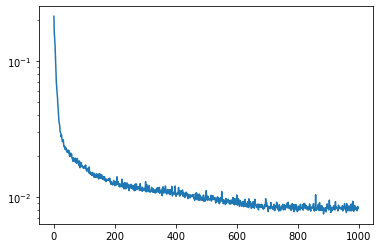

In [104]:
model, loss_log = run_training('TrainSet.mat', 10, 50, 5e-3, [8, 7, 6], 0, True, "MLP3_S10_B50_LR2e3_NR.pt", MLP_flag=True)
plt.figure()
plt.plot(range(1000), loss_log)
plt.yscale('log')

(2700.0, 2800.0)

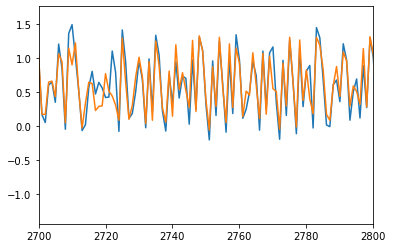

In [109]:
model.eval()
batch_size = 1
train_dataset = TimeseriesDataset('TrainSet.mat', seq_len=10)
train_loader = DataLoader(train_dataset, batch_size, shuffle=False)
loader = train_loader
loss = np.zeros(len(loader))
gt = np.zeros(len(loader))
pred = np.zeros(len(loader))
loss_function = nn.MSELoss()
for i, (X, y) in enumerate(loader):
    X = torch.swapaxes(X, 1, 2)
    output = model(X)
    pred[i] = output
    gt[i] = y
    loss[i] = loss_function(output.detach(), y[:, 0])

plt.figure()
plt.plot(range(len(loader)), gt)
plt.plot(range(len(loader)), pred)
plt.xlim([2700, 2800])

In [3]:
model_32, loss_log_32 = run_training('TrainSet.mat', 10, 50, 2e-3, [32], 0, True, "MLP1_32_S10_B50_LR2e3_NR.pt", MLP_flag=True)


  0%|          | 3/1000 [00:00<01:52,  8.87it/s]

Epoch 0, loss: 0.21753319303740512
-----------


 10%|█         | 103/1000 [00:08<01:12, 12.32it/s]

Epoch 100, loss: 0.023115167471037788
-----------


 20%|██        | 203/1000 [00:17<01:08, 11.67it/s]

Epoch 200, loss: 0.015015126103637637
-----------


 30%|███       | 303/1000 [00:25<00:56, 12.41it/s]

Epoch 300, loss: 0.012028510595293163
-----------


 40%|████      | 403/1000 [00:33<00:48, 12.35it/s]

Epoch 400, loss: 0.010607101243234926
-----------


 50%|█████     | 503/1000 [00:41<00:41, 11.84it/s]

Epoch 500, loss: 0.00911493211022609
-----------


 60%|██████    | 603/1000 [00:50<00:33, 11.84it/s]

Epoch 600, loss: 0.008221671328071382
-----------


 70%|███████   | 703/1000 [00:58<00:24, 12.00it/s]

Epoch 700, loss: 0.007797323589489519
-----------


 80%|████████  | 803/1000 [01:06<00:16, 12.03it/s]

Epoch 800, loss: 0.007526089263322589
-----------


 90%|█████████ | 903/1000 [01:14<00:07, 12.46it/s]

Epoch 900, loss: 0.007235906447621656
-----------


100%|██████████| 1000/1000 [01:22<00:00, 12.11it/s]


Epoch 999, loss: 0.007339053938247181
-----------


NameError: name 'loss_log' is not defined

<Figure size 432x288 with 0 Axes>

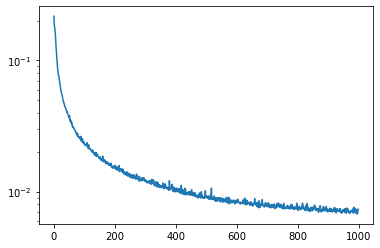

In [5]:
plt.figure()
plt.plot(range(1000), loss_log_32)
plt.yscale('log')

(2700.0, 2800.0)

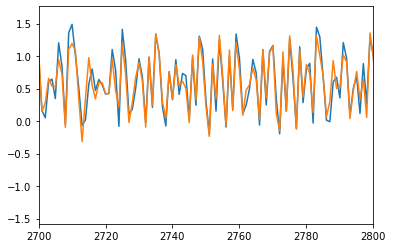

In [4]:
model_32.eval()
batch_size = 1
train_dataset = TimeseriesDataset('TrainSet.mat', seq_len=10)
train_loader = DataLoader(train_dataset, batch_size, shuffle=False)
loader = train_loader
loss = np.zeros(len(loader))
gt = np.zeros(len(loader))
pred = np.zeros(len(loader))
loss_function = nn.MSELoss()
for i, (X, y) in enumerate(loader):
    X = torch.swapaxes(X, 1, 2)
    output = model_32(X)
    pred[i] = output
    gt[i] = y
    loss[i] = loss_function(output.detach(), y[:, 0])

plt.figure()
plt.plot(range(len(loader)), gt)
plt.plot(range(len(loader)), pred)
plt.xlim([2700, 2800])

In [106]:
model_rnn = nts_RNN([8, 7, 6])
x = torch.randn(5, 10, 1)
output = model_rnn(x)
output.shape

torch.Size([5])

In [107]:
model_rnn, loss_log_rnn = run_training('TrainSet.mat', 10, 50, 2e-3, [8, 7, 6], 0, False, "L3_S10_B50_LR2e3_NR.pt", MLP_flag=False)

  0%|          | 2/1000 [00:00<03:00,  5.53it/s]

Epoch 0, loss: 0.36170301201579336
-----------


 10%|█         | 102/1000 [00:17<02:35,  5.77it/s]

Epoch 100, loss: 0.007317676579907209
-----------


 20%|██        | 202/1000 [00:36<02:22,  5.62it/s]

Epoch 200, loss: 0.004986015523292616
-----------


 30%|███       | 302/1000 [00:53<02:02,  5.68it/s]

Epoch 300, loss: 0.004063058602316612
-----------


 40%|████      | 402/1000 [01:12<01:46,  5.60it/s]

Epoch 400, loss: 0.00338950109601553
-----------


 50%|█████     | 502/1000 [01:30<01:26,  5.77it/s]

Epoch 500, loss: 0.0027493867123816775
-----------


 60%|██████    | 602/1000 [01:48<01:13,  5.43it/s]

Epoch 600, loss: 0.0026785451535053634
-----------


 70%|███████   | 702/1000 [02:06<00:52,  5.67it/s]

Epoch 700, loss: 0.0027729349011289223
-----------


 80%|████████  | 802/1000 [02:23<00:34,  5.82it/s]

Epoch 800, loss: 0.002264607094540414
-----------


 90%|█████████ | 902/1000 [02:41<00:16,  5.88it/s]

Epoch 900, loss: 0.0021426082636065943
-----------


100%|██████████| 1000/1000 [02:57<00:00,  5.62it/s]

Epoch 999, loss: 0.001966929332491338
-----------


(2700.0, 2800.0)

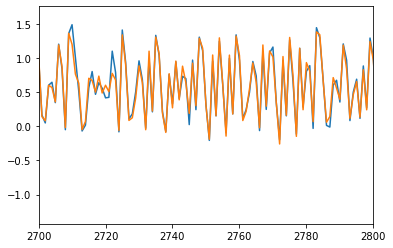

In [111]:
model_rnn.eval()
batch_size = 1
train_dataset = TimeseriesDataset('TrainSet.mat', seq_len=10)
train_loader = DataLoader(train_dataset, batch_size, shuffle=False)
loader = train_loader
loss = np.zeros(len(loader))
gt = np.zeros(len(loader))
pred = np.zeros(len(loader))
for i, (X, y) in enumerate(loader):
    output = model_rnn(X)
    pred[i] = output
    gt[i] = y
    loss[i] = loss_function(output.detach(), y.flatten())

plt.figure()
plt.plot(range(len(loader)), gt)
plt.plot(range(len(loader)), pred)
plt.xlim([2700, 2800])

(3960.0, 4040.0)

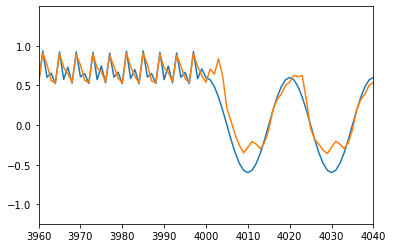

In [118]:
model.eval()
batch_size = 1
train_dataset = TimeseriesDataset('TestSet_sw.mat', seq_len=10)
train_loader = DataLoader(train_dataset, batch_size, shuffle=False)
loader = train_loader
loss = np.zeros(len(loader))
gt = np.zeros(len(loader))
pred = np.zeros(len(loader))
loss_function = nn.MSELoss()
for i, (X, y) in enumerate(loader):
    X = torch.swapaxes(X, 1, 2)
    output = model(X)
    pred[i] = output
    gt[i] = y
    loss[i] = loss_function(output.detach(), y[:, 0])

plt.figure()
plt.plot(range(len(loader)), gt)
plt.plot(range(len(loader)), pred)
plt.xlim([3960, 4040])

(3960.0, 4040.0)

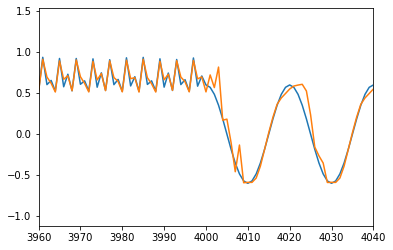

In [119]:
model_rnn.eval()
batch_size = 1
train_dataset = TimeseriesDataset('TestSet_sw.mat', seq_len=10)
train_loader = DataLoader(train_dataset, batch_size, shuffle=False)
loader = train_loader
loss = np.zeros(len(loader))
gt = np.zeros(len(loader))
pred = np.zeros(len(loader))
for i, (X, y) in enumerate(loader):
    output = model_rnn(X)
    pred[i] = output
    gt[i] = y
    loss[i] = loss_function(output.detach(), y.flatten())

plt.figure()
plt.plot(range(len(loader)), gt)
plt.plot(range(len(loader)), pred)
plt.xlim([3960, 4040])

In [4]:
model_rnn, loss_log_rnn = run_training('TrainSet.mat', 10, 50, 2e-3, [8, 7, 6], 1e-4, True, "MLP3_S10_B50_LR2e3_R1e4.pt", MLP_flag=True)
plt.figure()
plt.plot(range(1000), loss_log)
plt.yscale('log')

  0%|          | 2/1000 [00:00<02:35,  6.40it/s]

Epoch 0, loss: 0.24144387728237843
-----------


 10%|█         | 102/1000 [00:10<01:28, 10.17it/s]

Epoch 100, loss: 0.033551661164632866
-----------


 20%|██        | 202/1000 [00:20<01:18, 10.22it/s]

Epoch 200, loss: 0.02244862967303821
-----------


 30%|███       | 303/1000 [00:30<01:08, 10.24it/s]

Epoch 300, loss: 0.01922867239892974
-----------


 40%|████      | 403/1000 [00:39<00:58, 10.26it/s]

Epoch 400, loss: 0.0172167984758514
-----------


 50%|█████     | 503/1000 [00:49<00:49, 10.12it/s]

Epoch 500, loss: 0.01591862112304175
-----------


 60%|██████    | 603/1000 [00:59<00:39, 10.12it/s]

Epoch 600, loss: 0.014993873460648151
-----------


 70%|███████   | 703/1000 [01:09<00:29, 10.10it/s]

Epoch 700, loss: 0.014140413388364262
-----------


 80%|████████  | 803/1000 [01:19<00:19, 10.21it/s]

Epoch 800, loss: 0.013886854704981157
-----------


 90%|█████████ | 903/1000 [01:29<00:09, 10.23it/s]

Epoch 900, loss: 0.013940047539238418
-----------


100%|██████████| 1000/1000 [01:38<00:00, 10.13it/s]


Epoch 999, loss: 0.013127529469144705
-----------


NameError: name 'loss_log' is not defined

<Figure size 432x288 with 0 Axes>

  0%|          | 2/1000 [00:00<01:28, 11.32it/s]

Epoch 0, loss: 0.22926419420720456
-----------


 10%|█         | 102/1000 [00:08<01:12, 12.42it/s]

Epoch 100, loss: 0.026257988935397877
-----------


 20%|██        | 202/1000 [00:16<01:03, 12.53it/s]

Epoch 200, loss: 0.019149719793758877
-----------


 30%|███       | 302/1000 [00:24<00:57, 12.22it/s]

Epoch 300, loss: 0.016370307920234545
-----------


 40%|████      | 402/1000 [00:32<00:48, 12.37it/s]

Epoch 400, loss: 0.013614169628983671
-----------


 50%|█████     | 502/1000 [00:40<00:39, 12.45it/s]

Epoch 500, loss: 0.012189247614734776
-----------


 60%|██████    | 602/1000 [00:48<00:32, 12.40it/s]

Epoch 600, loss: 0.011464536302610413
-----------


 70%|███████   | 702/1000 [00:56<00:24, 12.19it/s]

Epoch 700, loss: 0.011501958000135946
-----------


 80%|████████  | 802/1000 [01:04<00:15, 12.66it/s]

Epoch 800, loss: 0.010736651273423827
-----------


 90%|█████████ | 902/1000 [01:12<00:07, 12.68it/s]

Epoch 900, loss: 0.010190663411496924
-----------


100%|██████████| 1000/1000 [01:20<00:00, 12.44it/s]


Epoch 999, loss: 0.010008526351916921
-----------


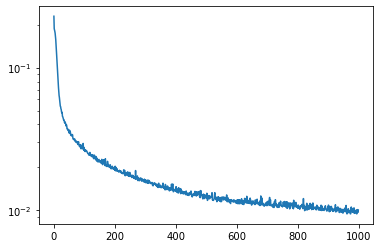

In [5]:
model_rnn, loss_log_mlp = run_training('TrainSet.mat', 10, 50, 2e-3, [32], 1e-4, True, "MLP1_32_S10_B50_LR2e3_R1e4.pt", MLP_flag=True)
plt.figure()
plt.plot(range(1000), loss_log_mlp)
plt.yscale('log')